# Problem Statement : Use relevant machine learning model to predict flight fare

In [7]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
pd.set_option('Display.max_columns',None)

In [9]:
# Loading Dataset
data=pd.read_csv("Flight_Fare.csv")
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/19,Banglore,New Delhi,BLR → DEL,22:20,22/03/23 1:10,2h 50m,non-stop,No info,3897
1,Air India,01/05/19,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09/06/19,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,10/06/23 4:25,19h,2 stops,No info,13882
3,IndiGo,12/05/19,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/19,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,09/04/19,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/19,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/19,Banglore,Delhi,BLR → DEL,8:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/19,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


## Domain Analysis

Airline: So this column will have all the types of airlines like Indigo, Jet Airways,Air India, and many more.
         
Date_of_Journey: This column will let us know about the date on which passenger’s journey will start.
                 
Source: This column holds the name of the place from where the passenger’s journey will start.

Destination: This column holds the name of the place to where passengers wanted to travel.

Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.

Arrival_Time: Arrival time is when the passenger will reach his/her destination.

Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.

Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.

Additional_Info: In this column, we will get information about food, kind of food, and other amenities.

Price: Price of the flight for a complete journey including all the expenses before onboarding.

<!-- # Domain Analysis
# Price is the target
# Airline, Date_of_Journey,	Source,	Destination, Route, Dep_Time, Arrival_Time, Duration, Total_Stops, Additional_Info are input variables
# This data basically tells us about the prices of the flights which includes 'IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
  'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia','Vistara Premium economy', 'Jet Airways Business','Multiple carriers Premium
  economy', 'Trujet' based on 'Date_of_Journey', 'Source', 'Destination', 'Route','Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
  'Additional_Info'. -->

# Basic Checks

In [4]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [5]:
data.shape

(10683, 11)

In [6]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/19,Banglore,New Delhi,BLR → DEL,22:20,22/03/23 1:10,2h 50m,non-stop,No info,3897
1,Air India,01/05/19,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09/06/19,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,10/06/23 4:25,19h,2 stops,No info,13882
3,IndiGo,12/05/19,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/19,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,09/04/19,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/19,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/19,Banglore,Delhi,BLR → DEL,8:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/19,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,09/05/19,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
data.describe(include="O")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,40,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/19,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [12]:
data.groupby('Source')['Source'].agg('count')

Source
Banglore    2197
Chennai      381
Delhi       4537
Kolkata     2871
Mumbai       697
Name: Source, dtype: int64

In [13]:
data.groupby('Destination')['Destination'].agg('count')

Destination
Banglore     2871
Cochin       4537
Delhi        1265
Hyderabad     697
Kolkata       381
New Delhi     932
Name: Destination, dtype: int64

In [14]:
data.groupby('Airline')['Airline'].agg('count')

Airline
Air Asia                              319
Air India                            1752
GoAir                                 194
IndiGo                               2053
Jet Airways                          3849
Jet Airways Business                    6
Multiple carriers                    1196
Multiple carriers Premium economy      13
SpiceJet                              818
Trujet                                  1
Vistara                               479
Vistara Premium economy                 3
Name: Airline, dtype: int64

In [15]:
#Find unique categories in categorical columns
for i in data.columns.drop("Price"):
    print(i,data[i].unique())
    print(data[i].value_counts())#Imbalanced Data
    print("***************************")

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
***************************
Date_of_Journey ['24/03/19' '01/05/19' '09/06/19' '12/05/19' '01/03/19' '24/06/19'
 '12/03/19' '27/05/19' '01/06/19' '18/04/19' '09/05/19' '24/04/19'
 '03/03/19' '15/04/19' '12/06/19' '06/03/19' '21/03/19' '03/04/19'
 '06/05/19' '15/

In [10]:
#Dropping irrelevant columns
data2= data.drop(["Route","Additional_Info"],axis=1)
data2.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/19,Banglore,New Delhi,22:20,22/03/23 1:10,2h 50m,non-stop,3897
1,Air India,01/05/19,Kolkata,Banglore,5:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,09/06/19,Delhi,Cochin,9:25,10/06/23 4:25,19h,2 stops,13882
3,IndiGo,12/05/19,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/19,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


# Exploratory Data Analysis

In [17]:
#!pip3 install sweetviz

In [18]:
'''#Library for univariate analysis
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_html("myreport.html")'''

'#Library for univariate analysis\nimport sweetviz as sv\nmy_report=sv.analyze(data)\nmy_report.show_html("myreport.html")'

In [11]:
data1=data.drop("Price",axis=1)
data1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/19,Banglore,New Delhi,BLR → DEL,22:20,22/03/23 1:10,2h 50m,non-stop,No info
1,Air India,01/05/19,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,09/06/19,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,10/06/23 4:25,19h,2 stops,No info
3,IndiGo,12/05/19,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/19,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,09/04/19,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info
10679,Air India,27/04/19,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info
10680,Jet Airways,27/04/19,Banglore,Delhi,BLR → DEL,8:20,11:20,3h,non-stop,No info
10681,Vistara,01/03/19,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info


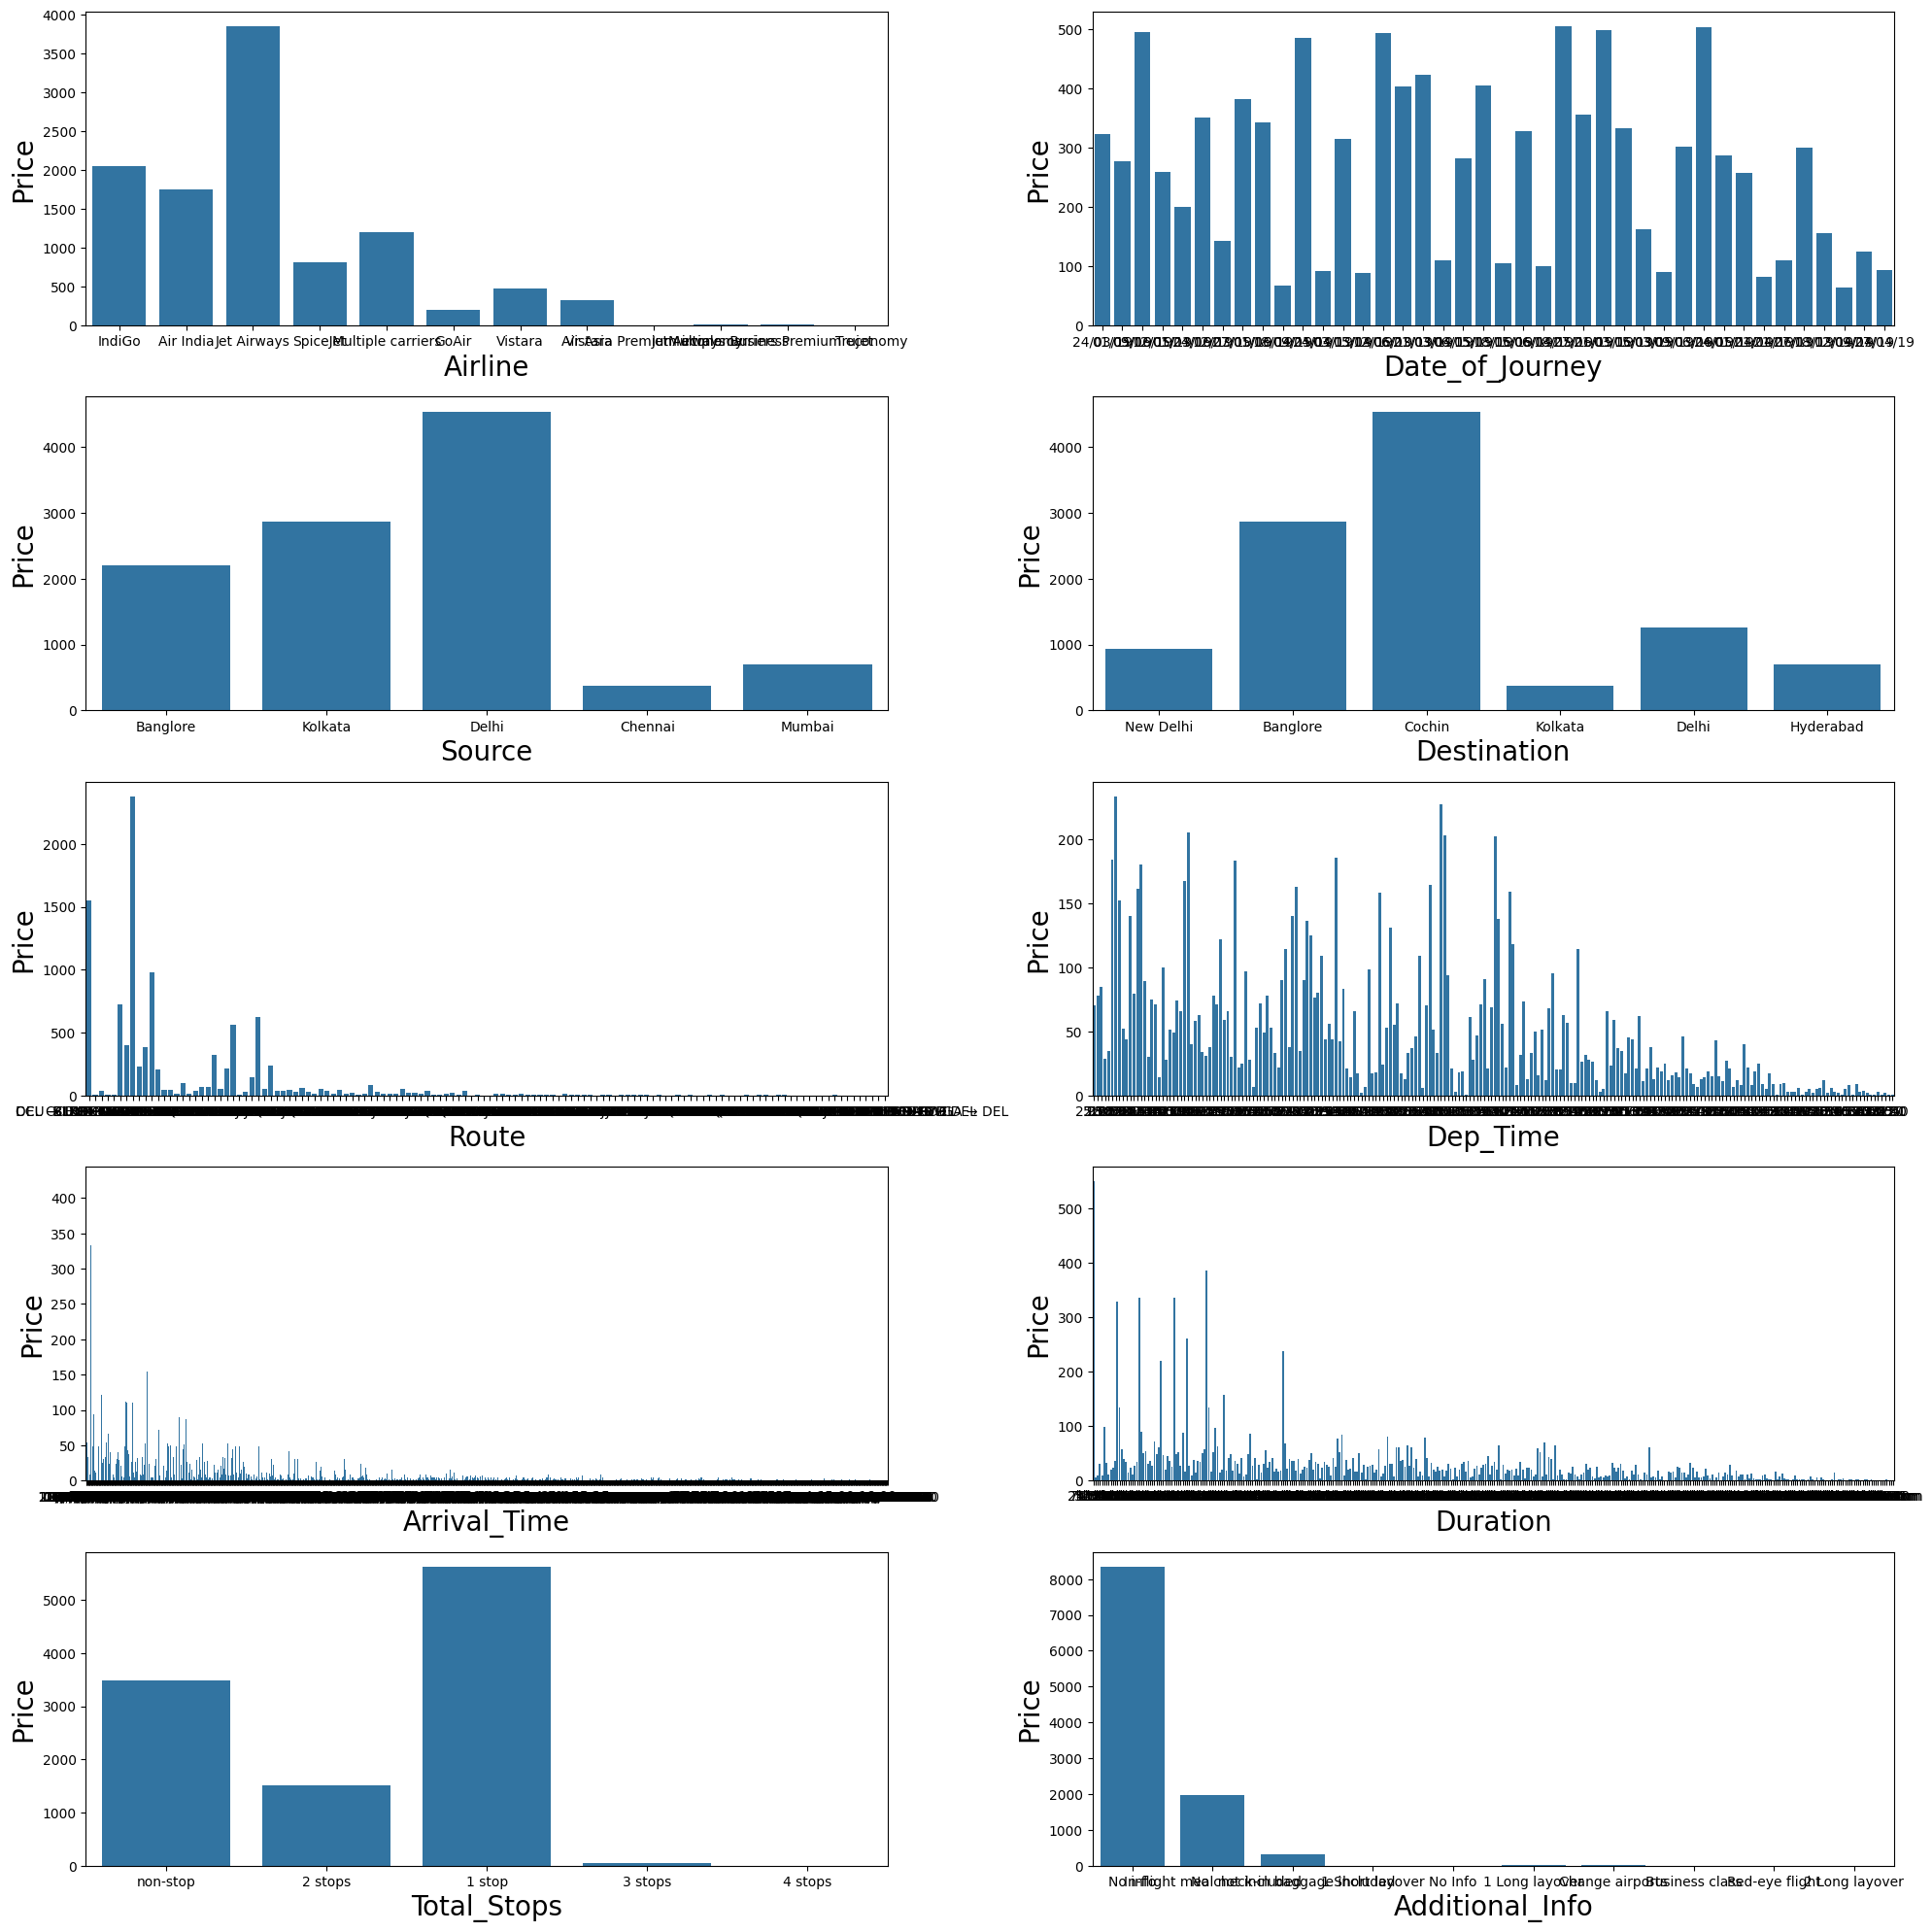

In [12]:
plt.figure(figsize=(20,20),facecolor="White")
plotnumber=1
for column in data1:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.countplot(x=data1[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel("Price", fontsize=20)
    plotnumber+=1 
plt.tight_layout()

# Insights 
'''Jet Airways has been a favored airline, often regarded as the primary choice, while IndiGo consistently holds a strong second position in terms of passenger preferences.
* The second and third weeks of May and June tend to emerge as popular choices for travel, closely followed by the month of March
* A significant majority of flights are reserved from Delhi, with Kolkata following closely as the next preferred source location
* The majority of flight reservations indicate a preference for Cochin as the top destination, closely trailed by Bangalore
* The route from Delhi to Cochine is the preffered route where as Banglore to Delhi holds a second position
* The time 7PM to 9PM is preffered arrival time however, There is no preffered departure time
* The most preferred duration for flights stands at 2 hours and 50 minutes
* Passenger preferences lean towards a one-stop journey as the favored travel option, closely followed by the convenience of a non-stop flight
* Passengers commonly favor an arrival window between 7 PM to 9 PM for their flights, while no specific departure time exhibits a consistent preference, indicating flexibility or varied scheduling among travelers'''

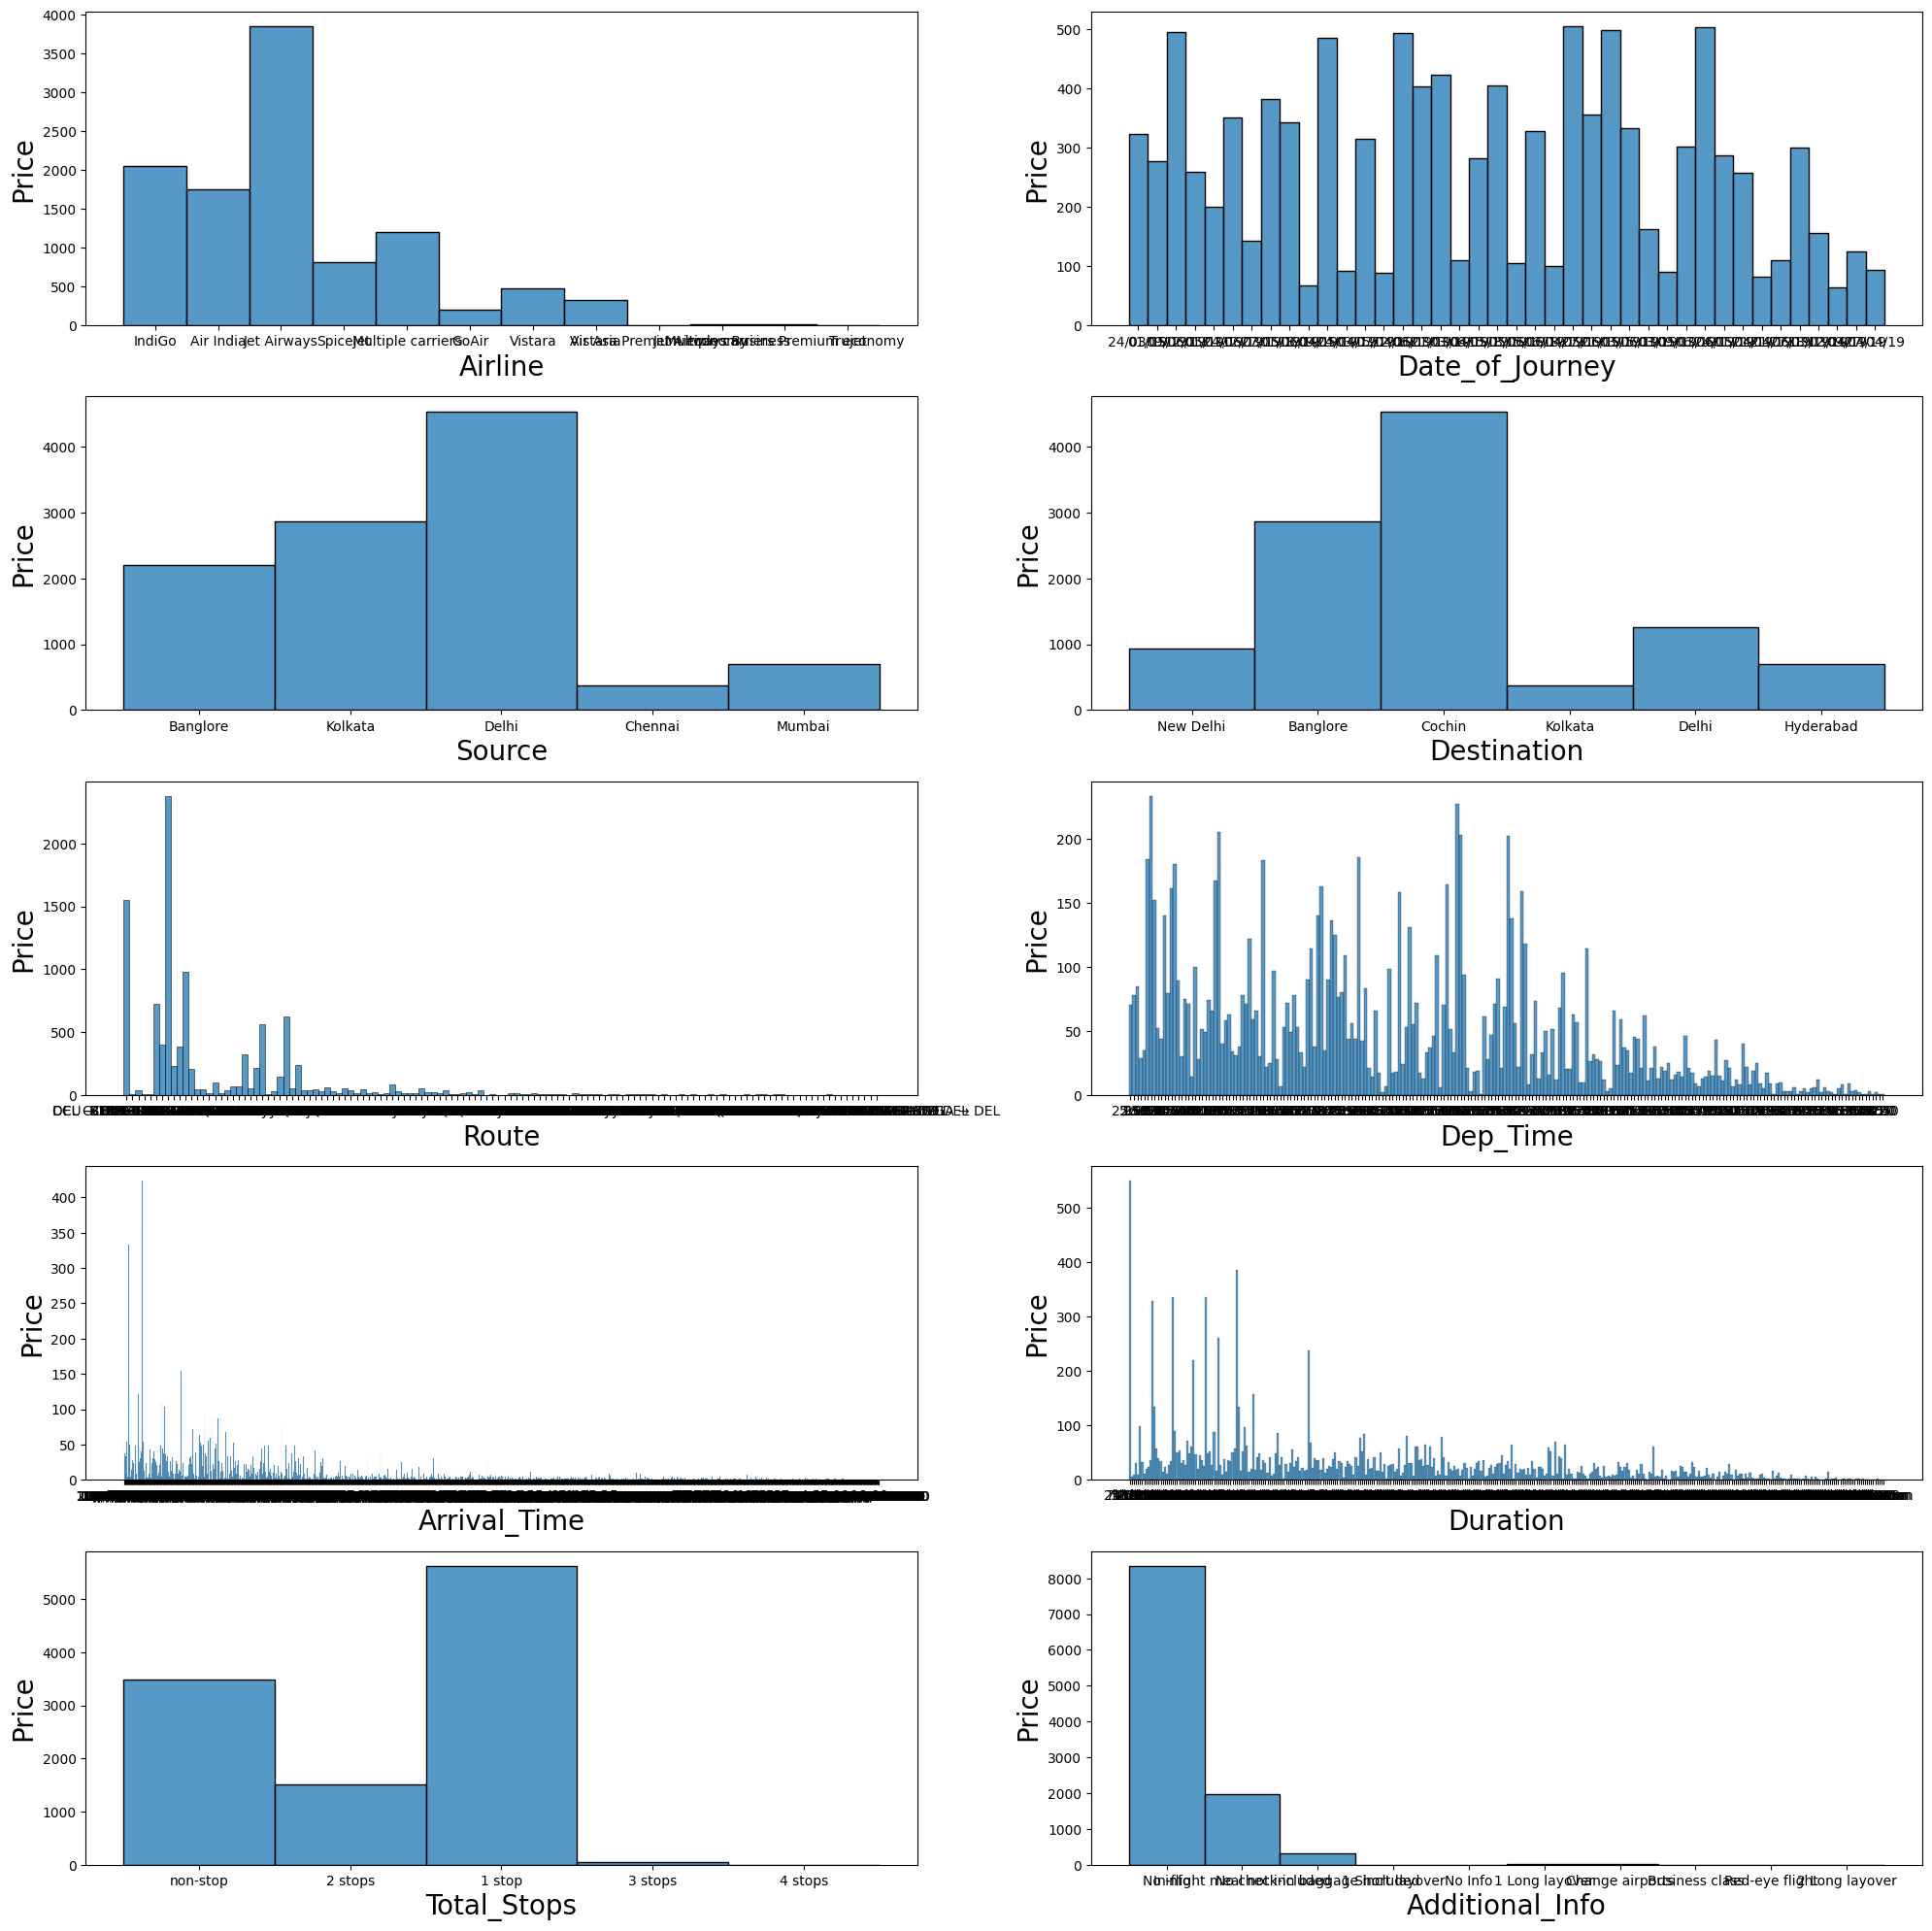

In [13]:
# Histplot
plt.figure(figsize=(20,20),facecolor="White")
plotnumber=1
for column in data.columns:
    if plotnumber<=10:
        ax = plt.subplot(5,2,plotnumber)
        sns.histplot(x=data[column])
        plt.xlabel(column, fontsize=20)
        plt.ylabel("Price", fontsize=20)
    plotnumber+=1 
plt.tight_layout()

### Bivariate Analysis

In [23]:
#Bivariate Analysis
#!pip3 install autoviz
#from autoviz.AutoViz_class import AutoViz_class
#AV=AutoViz_class()
#df=AV.AutoViz(filename="Flight_Fare.csv",verbose=2,chart_format="html")

In [24]:
#sns.pairplot(data,hue="Price")

# Data Preprocessing

In [25]:
data2.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

In [26]:
# if % of missing values is greater than 80% then drop that column
data2.isnull().sum()/len(data)*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Price              0.000000
dtype: float64

In [27]:
data3=data2.dropna()
data3.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

# Check for Duplicates

In [28]:
data3.duplicated().sum()

220

In [29]:
data4=data3.drop_duplicates()
data4.duplicated().sum()

0

## Feature Engineering

In [30]:
data4['Journey_Day']=data4['Date_of_Journey'].str.split('/').str[0].astype(int)

In [31]:
data4['Journey_Month']=data4['Date_of_Journey'].str.split('/').str[1].astype(int)

In [32]:
data4.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/19,Banglore,New Delhi,22:20,22/03/23 1:10,2h 50m,non-stop,3897,24,3
1,Air India,01/05/19,Kolkata,Banglore,5:50,13:15,7h 25m,2 stops,7662,1,5
2,Jet Airways,09/06/19,Delhi,Cochin,9:25,10/06/23 4:25,19h,2 stops,13882,9,6
3,IndiGo,12/05/19,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5
4,IndiGo,01/03/19,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3


In [33]:
data4.drop(['Date_of_Journey'],axis=1,inplace=True)

In [34]:
data4["Dep_hour"] = pd.to_datetime(data4["Dep_Time"]).dt.hour
data4["Dep_min"] = pd.to_datetime(data4["Dep_Time"]).dt.minute

In [35]:
data4["Arrival_hour"] = pd.to_datetime(data4.Arrival_Time).dt.hour
data4["Arrival_min"] = pd.to_datetime(data4.Arrival_Time).dt.minute

In [36]:
data4.drop(['Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [37]:
data4.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


## Encoding

In [38]:
data4.Airline.value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

### As Airline is nominal categorical data we will perform one hot encoding

In [64]:
Airline=data4[['Airline']]
Airline=pd.get_dummies(Airline, drop_first=False)
Airline.head()

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False


In [40]:
data4.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [41]:
data4.Source.value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [65]:
Source=data4[['Source']]
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [43]:
data4.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [44]:
data4.Destination.value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [66]:
Destination=data4[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [46]:
data4.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [51]:
data4.Total_Stops.value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [52]:
data4.Total_Stops = data4.Total_Stops.map({'1 stop':4,'non-stop':3, '2 stops':2, '3 stops':1, '4 stops':0})

In [53]:
data4.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,2h 50m,3,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,4,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,4,13302,1,3,16,50,21,35


In [54]:
data4['Duration']=data4['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [55]:
data4.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,170,3,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,445,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,4,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,4,13302,1,3,16,50,21,35


In [67]:
data5=pd.concat([data4, Airline, Source, Destination], axis=1)
data5.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,170,3,3897,24,3,22,20,1,10,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,Air India,Kolkata,Banglore,445,2,7662,1,5,5,50,13,15,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,Jet Airways,Delhi,Cochin,1140,2,13882,9,6,9,25,4,25,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,IndiGo,Kolkata,Banglore,325,4,6218,12,5,18,5,23,30,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,IndiGo,Banglore,New Delhi,285,4,13302,1,3,16,50,21,35,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [68]:
data5.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [70]:
data5 = data5.astype(int)

In [71]:
data5.head()

,Duration,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,3,3897,24,3,22,20,1,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,2,7662,1,5,5,50,13,15,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,2,13882,9,6,9,25,4,25,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,4,6218,12,5,18,5,23,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,4,13302,1,3,16,50,21,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [75]:
data5.shape

(10462, 30)

In [72]:
X=data5.drop("Price",axis=1)

In [73]:
y=data5.Price
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int32

In [ ]:
## Find Correlation between attributes

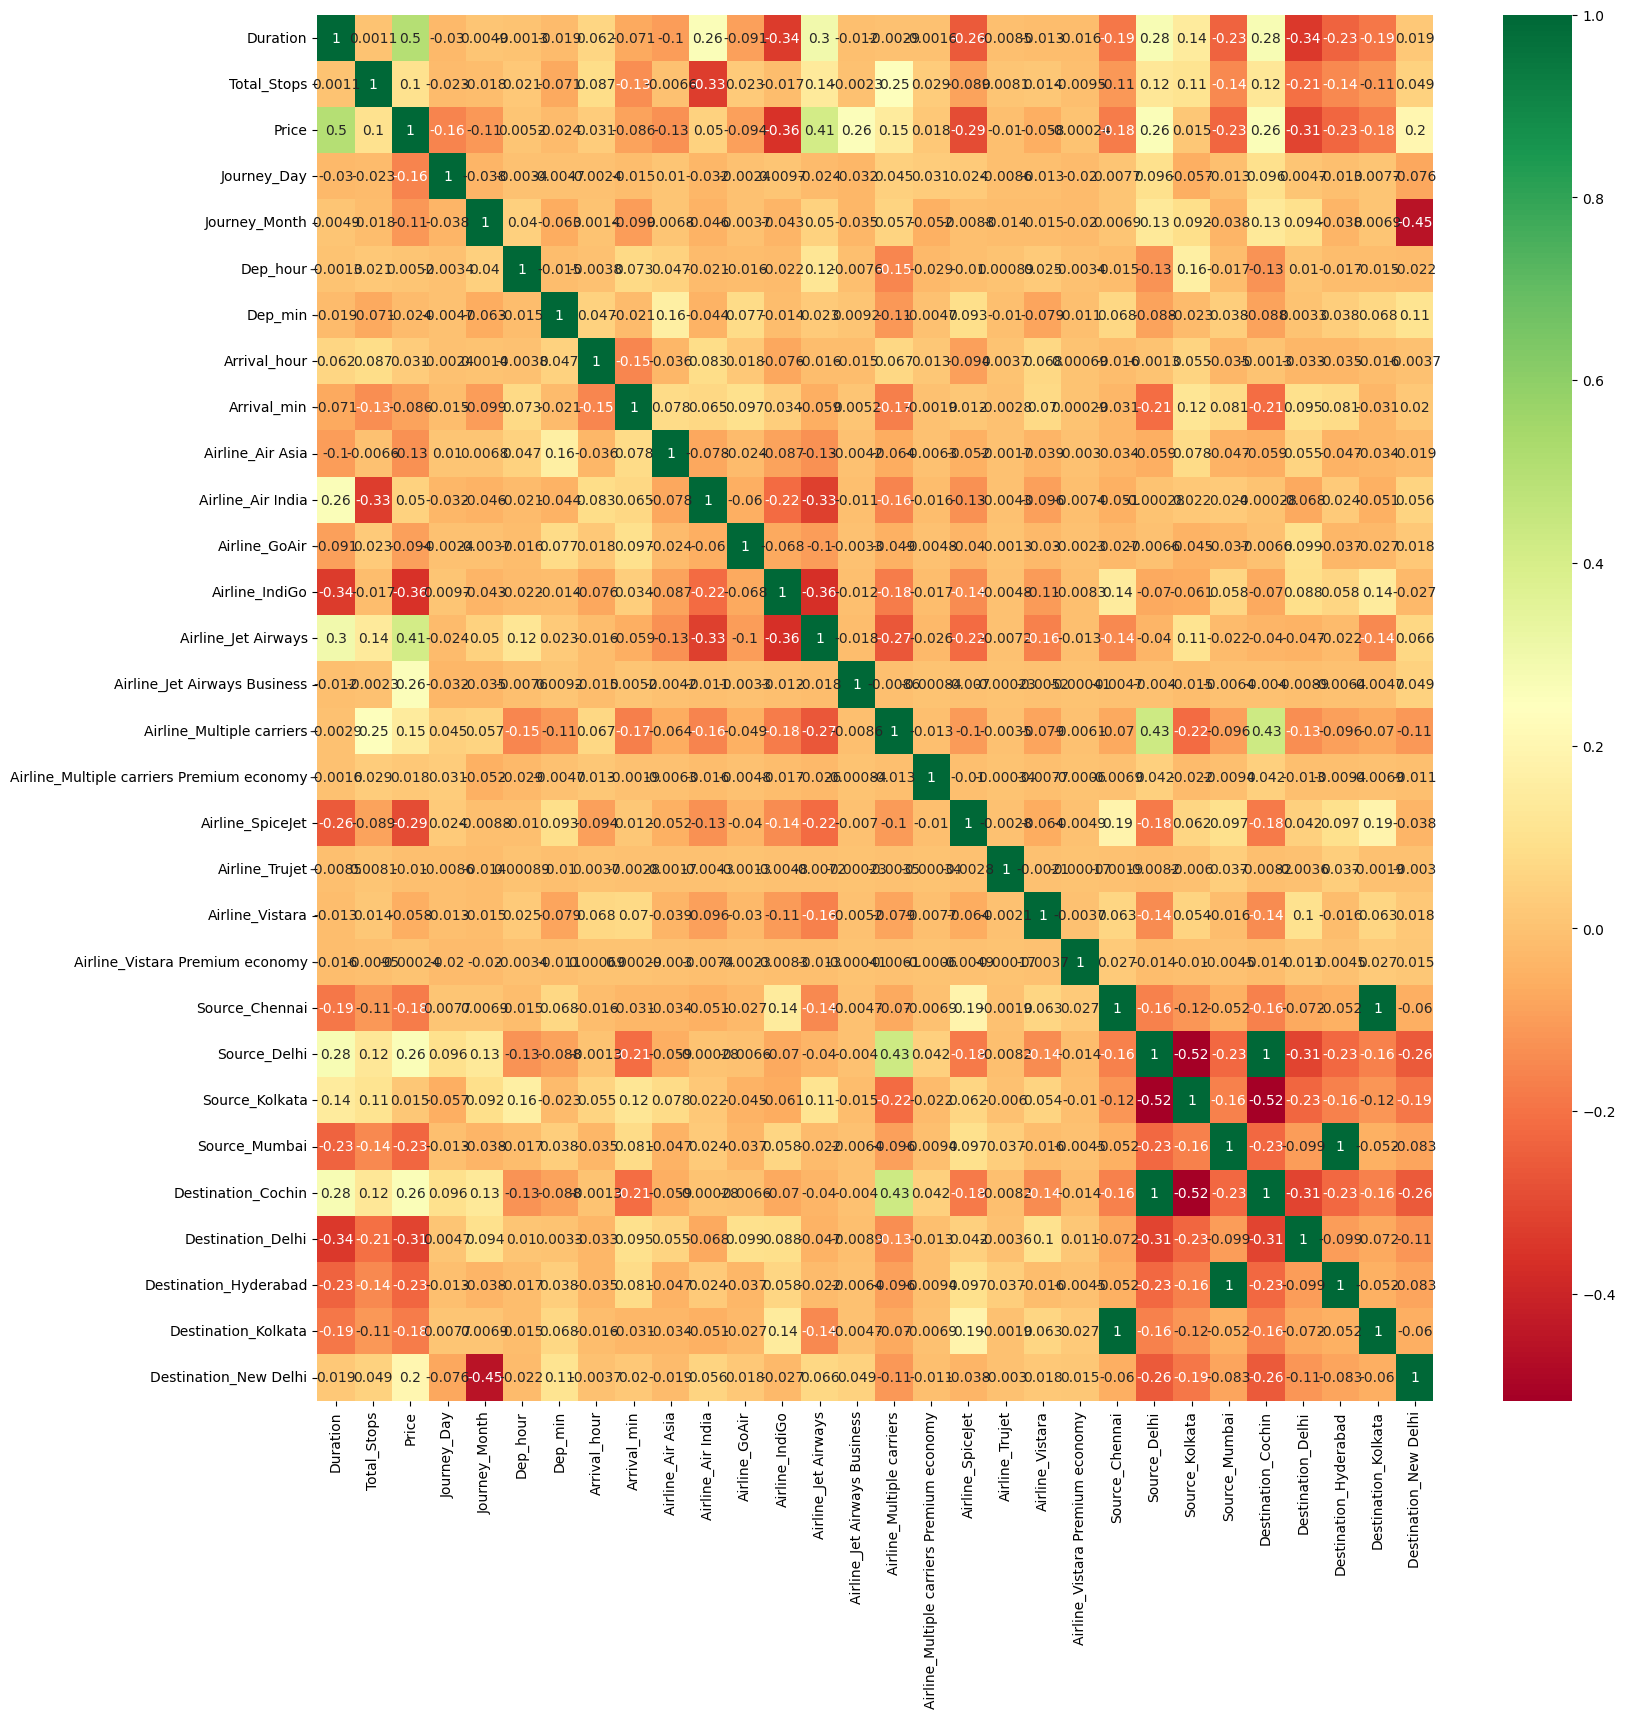

In [74]:
plt.figure(figsize=(18,18))
sns.heatmap(data5.corr(), annot=True, cmap="RdYlGn")

plt.show()

## Train-Test splitting

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LR=LinearRegression() 
LR.fit(X_train_scaled,y_train) 
LR.score(X_test_scaled,y_test) 
#y_predict=LR.predict(X_test)

0.5344177727100723

## Using K Fold cross validation to measure accuracy of our LinearRegression model

In [78]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.53240642, 0.55034569, 0.56015316, 0.58719054, 0.60986208])

In [ ]:
## Finding best model using GridSearchCV

In [79]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
                  }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [80]:
find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.568288,"{'fit_intercept': False, 'positive': False}"
1,lasso,0.567814,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.696229,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [82]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf.score(X_test,y_test)

0.816527017582212

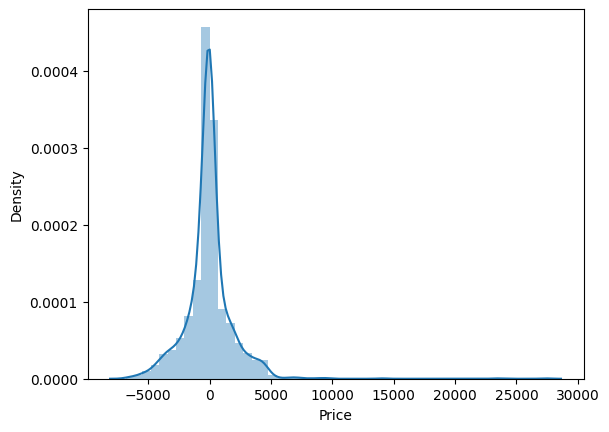

In [83]:
sns.distplot(y_test-y_pred)
plt.show()

In [84]:
from sklearn import metrics

In [85]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1168.0394874411304
MSE: 3825462.391289923
RMSE: 1955.8789306319354


In [86]:
metrics.r2_score(y_test, y_pred)

0.816527017582212

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [91]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

max_features = ['auto', 'sqrt']  # Number of features to consider at every split

max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]# Maximum number of levels in tree

min_samples_split = [2, 5, 10, 15, 100] # Minimum number of samples required to split a node

min_samples_leaf = [1, 2, 5, 10] # Minimum number of samples required at each leaf node

In [92]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [94]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [95]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [96]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [97]:
prediction = rf_random.predict(X_test)

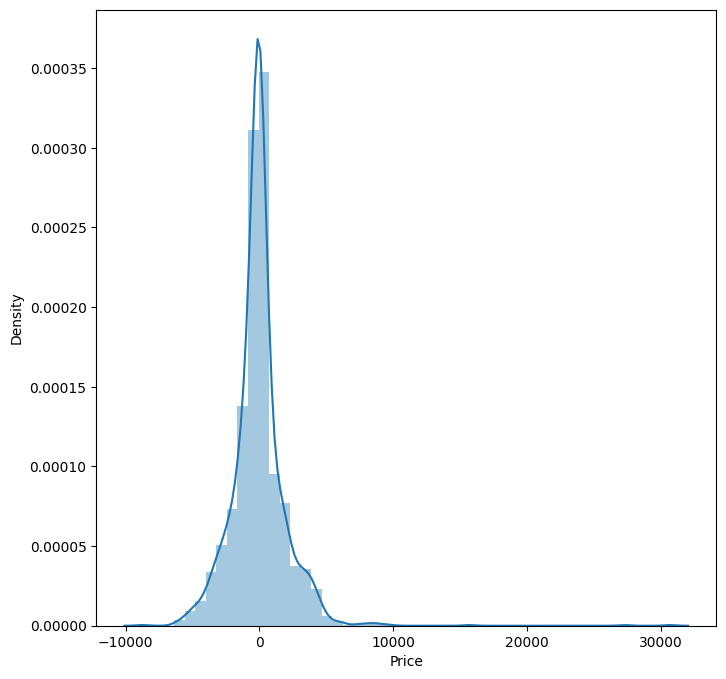

In [98]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [99]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1269.751364398916
MSE: 4283508.174832686
RMSE: 2069.6637830412665


In [ ]:
## Pickle file

In [106]:
import pickle

file = open('flight_rf.pkl', 'wb') # open a file, where you ant to store the data
pickle.dump(rf_random, file)

In [107]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [108]:
y_prediction = forest.predict(X_test)

In [109]:
metrics.r2_score(y_test, y_prediction)

0.7945586860723195